In [1]:
import numpy as np
import pandas as pd

In [2]:
## norden 1 month
data = pd.ExcelFile("rolling front month norden.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
norden_m1 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'norden_m1'})
norden_m1 = norden_m1.loc[norden_m1['Date'] >= '2007-01-01'].loc[norden_m1['Date'] < '2024-01-01'].reset_index(drop=True)
norden_m1

,Date,norden_m1
0,2007-01-02,35.50
1,2007-01-03,34.00
2,2007-01-04,33.50
3,2007-01-05,32.85
4,2007-01-08,30.35
...,...,...
4261,2023-12-21,78.10
4262,2023-12-22,83.00
4263,2023-12-27,93.00
4264,2023-12-28,90.75


In [3]:
## norden 3 month
data = pd.ExcelFile("rolling front month 3 norden.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
norden_m3 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'norden_m3'})
norden_m3 = norden_m3.loc[norden_m3['Date'] >= '2007-01-01'].loc[norden_m3['Date'] < '2024-01-01'].reset_index(drop=True)

## norden 12 month

data = pd.ExcelFile("rolling front year norden.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
norden_m12 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'norden_m12'})
norden_m12 = norden_m12.loc[norden_m12['Date'] >= '2007-01-01'].loc[norden_m12['Date'] < '2024-01-01'].reset_index(drop=True)

norden_m12

,Date,norden_m12
0,2007-01-02,40.25
1,2007-01-03,39.90
2,2007-01-04,39.90
3,2007-01-05,39.30
4,2007-01-08,37.90
...,...,...
4259,2023-12-21,50.45
4260,2023-12-22,52.75
4261,2023-12-27,58.18
4262,2023-12-28,44.65


In [4]:
## germany 1 month
data = pd.ExcelFile("rolling front month tyskland.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
germany_m1 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'germany_m1'})
germany_m1 = germany_m1.loc[germany_m1['Date'] >= '2007-01-01'].loc[germany_m1['Date'] < '2024-01-01'].reset_index(drop=True)
## germany 3 month
data = pd.ExcelFile("rolling front month 3 tyskland.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
germany_m3 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'germany_m3'})
germany_m3 = germany_m3.loc[germany_m3['Date'] >= '2007-01-01'].loc[germany_m3['Date'] < '2024-01-01'].reset_index(drop=True)
## germany 12 month
data = pd.ExcelFile("rolling front year tyskland.xlsx").parse('Sheet1', skiprows=3, index_col=None, na_values=['NA'])
germany_m12 = data[['Date', 'Settlement']].rename(columns={'Settlement': 'germany_m12'})
germany_m12 = germany_m12.loc[germany_m12['Date'] >= '2007-01-01'].loc[germany_m12['Date'] < '2024-01-01'].reset_index(drop=True)

germany_m12

,Date,germany_m12
0,2007-01-02,54.70
1,2007-01-03,54.38
2,2007-01-04,54.35
3,2007-01-05,53.50
4,2007-01-08,52.79
...,...,...
4320,2023-12-21,92.04
4321,2023-12-22,93.04
4322,2023-12-27,95.72
4323,2023-12-28,97.50


In [5]:
data = pd.read_excel("Nordisk og tysk spot.xlsx")
spotprices = data.rename(columns={'Unnamed: 0': 'Date', 'Nordisk spot': 'norden_spot', 'Tysk spot': 'germany_spot'})
spotprices = spotprices.loc[spotprices['Date'] >= '2007-01-01'].loc[spotprices['Date'] < '2024-01-01'].reset_index(drop=True)
spotprices

,Date,norden_spot,germany_spot
0,2007-01-01,29.99,5.80
1,2007-01-02,32.47,32.90
2,2007-01-03,32.59,44.43
3,2007-01-04,30.63,28.25
4,2007-01-05,29.67,35.55
...,...,...,...
6204,2023-12-27,54.54,60.80
6205,2023-12-28,42.26,16.67
6206,2023-12-29,38.28,6.36
6207,2023-12-30,50.14,34.06


In [6]:
from functools import reduce

data_frames = [spotprices, norden_m1, norden_m3, norden_m12, germany_m1, germany_m3, germany_m12]

futures = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

futures = futures.sort_values('Date').dropna().reset_index(drop = 'True')
futures

,Date,norden_spot,germany_spot,norden_m1,norden_m3,norden_m12,germany_m1,germany_m3,germany_m12
0,2007-01-02,32.47,32.90,35.50,31.30,40.25,53.15,41.73,54.70
1,2007-01-03,32.59,44.43,34.00,30.40,39.90,52.85,41.20,54.38
2,2007-01-04,30.63,28.25,33.50,30.00,39.90,53.20,42.18,54.35
3,2007-01-05,29.67,35.55,32.85,29.40,39.30,51.65,40.98,53.50
4,2007-01-08,28.63,37.38,30.35,27.25,37.90,49.25,40.05,52.79
...,...,...,...,...,...,...,...,...,...
4258,2023-12-21,42.21,25.28,78.10,68.38,50.45,88.81,86.96,92.04
4259,2023-12-22,35.38,22.66,83.00,70.00,52.75,91.06,87.28,93.04
4260,2023-12-27,54.54,60.80,93.00,76.50,58.18,95.06,90.08,95.72
4261,2023-12-28,42.26,16.67,90.75,75.50,44.65,89.43,85.13,97.50


In [7]:
finland = pd.read_excel('weather_helsinki.xlsx')
finland['Date'] = pd.to_datetime(finland[['Year', 'Month', 'Day']])
finland = finland[['Date', 'Average temperature [Â°C]', 'Precipitation amount [mm]', 'Snow depth [cm]']]
finland = finland.rename(columns={'Average temperature [Â°C]': 'fin_temp', 'Precipitation amount [mm]': 'fin_rain', 'Snow depth [cm]': 'fin_snow'})
finland = finland.loc[finland['Date'] >= '2007-01-01'].loc[finland['Date'] < '2024-01-01'].reset_index(drop=True)
finland

,Date,fin_temp,fin_rain,fin_snow
0,2007-01-01,3,9.3,-1
1,2007-01-02,2.9,3.1,-1
2,2007-01-03,1.7,-1,-1
3,2007-01-04,2.9,6.3,-1
4,2007-01-05,4,0.9,-1
...,...,...,...,...
6204,2023-12-27,-3.9,0.2,19
6205,2023-12-28,-1.2,0.5,19
6206,2023-12-29,0.4,12.6,21
6207,2023-12-30,-3.5,1.6,32


In [8]:
norway = pd.read_excel('weather_oslo.xlsx')
norway = norway[['Time(norwegian mean time)', 'Mean air temperature (24 h)', 'Precipitation (24 h)', 'Snow depth']]
norway = norway.rename(columns={'Time(norwegian mean time)':'Date', 'Mean air temperature (24 h)':'nor_temp', 'Precipitation (24 h)': 'nor_rain', 'Snow depth': 'nor_snow'})
norway['Date'] = pd.to_datetime(norway['Date'], format='%d.%m.%Y')
norway = norway.sort_values('Date')
norway = norway.loc[norway['Date'] >= '2007-01-01'].loc[norway['Date'] < '2024-01-01'].reset_index(drop=True)
norway['nor_snow'].replace('-', pd.NA, inplace=True)
norway['nor_snow'] = norway['nor_snow'].fillna(0)
norway

,Date,nor_temp,nor_rain,nor_snow
0,2007-10-01,9.7,14.1,0
1,2007-10-02,6.8,0,0
2,2007-10-03,6.2,0,0
3,2007-10-04,6.9,0,0
4,2007-10-05,6.1,0,0
...,...,...,...,...
5839,2023-12-27,-8.1,0.7,43
5840,2023-12-28,-7.6,3.5,51
5841,2023-12-29,-6.4,8.1,53
5842,2023-12-30,-4.1,3.8,52


In [9]:
stockholm_temp = pd.read_excel('stockholm_temp.xlsx')
stockholm_rain = pd.read_excel('stockholm_rain.xlsx')
stockholm_snow = pd.read_excel('stockholm_snow.xlsx')
stockholm_snow['Date'] = pd.to_datetime(stockholm_snow['Date'], format='%d/%m/%Y')
stockholm_snow = stockholm_snow[['Date', 'snow depth (cm)']]
sweden = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                           how='outer'), [stockholm_temp, stockholm_rain, stockholm_snow])

sweden = sweden.rename(columns={ 'Air temperature (C)':'swe_temp', 'Precipitation (mm)': 'swe_rain', 'snow depth (cm)': 'swe_snow'})
sweden['swe_snow'] = sweden['swe_snow'].fillna(0)
sweden

,Date,swe_temp,swe_rain,swe_snow
0,2007-01-01,5.0,3.2,0.00
1,2007-01-02,3.2,0.0,0.00
2,2007-01-03,1.5,1.8,0.00
3,2007-01-04,5.3,1.6,0.00
4,2007-01-05,3.3,1.6,0.00
...,...,...,...,...
6174,2023-11-27,-5.6,0.8,0.02
6175,2023-11-28,-5.0,9.7,0.04
6176,2023-11-29,-3.5,0.8,0.15
6177,2023-11-30,-2.0,3.1,0.16


In [10]:
weather =  reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                           how='outer'), [norway, sweden, finland])
weather = weather.sort_values('Date')
weather

,Date,nor_temp,nor_rain,nor_snow,swe_temp,swe_rain,swe_snow,fin_temp,fin_rain,fin_snow
5844,2007-01-01,NaN,NaN,NaN,5.0,3.2,0.0,3,9.3,-1
5845,2007-01-02,NaN,NaN,NaN,3.2,0.0,0.0,2.9,3.1,-1
5846,2007-01-03,NaN,NaN,NaN,1.5,1.8,0.0,1.7,-1,-1
5847,2007-01-04,NaN,NaN,NaN,5.3,1.6,0.0,2.9,6.3,-1
5848,2007-01-05,NaN,NaN,NaN,3.3,1.6,0.0,4,0.9,-1
...,...,...,...,...,...,...,...,...,...,...
5839,2023-12-27,-8.1,0.7,43.0,NaN,NaN,NaN,-3.9,0.2,19
5840,2023-12-28,-7.6,3.5,51.0,NaN,NaN,NaN,-1.2,0.5,19
5841,2023-12-29,-6.4,8.1,53.0,NaN,NaN,NaN,0.4,12.6,21
5842,2023-12-30,-4.1,3.8,52.0,NaN,NaN,NaN,-3.5,1.6,32


In [11]:
total_df =  reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                           how='inner'), [futures, weather])
total_df  = total_df .sort_values('Date')
columns_to_adjust = ['nor_rain', 'nor_snow', 'swe_rain', 'swe_snow', 'fin_rain', 'fin_snow']

total_df.replace('-', np.nan, inplace=True)

for column in total_df.columns:
    if column != 'Date':
        total_df[column] = total_df[column].apply(lambda x: float(x) if isinstance(x, str) else x)

# Reemplazar los valores negativos por 0 en columnas específicas
columns_to_adjust = ['nor_rain', 'nor_snow', 'swe_rain', 'swe_snow', 'fin_rain', 'fin_snow']
total_df[columns_to_adjust] = total_df[columns_to_adjust].applymap(lambda x: 0 if x < 0 else x)

total_df = total_df.reset_index(drop = 'True')
total_df

C:\Users\jstam\AppData\Local\Temp\ipykernel_15328\2260362639.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total_df[columns_to_adjust] = total_df[columns_to_adjust].applymap(lambda x: 0 if x < 0 else x)


,Date,norden_spot,germany_spot,norden_m1,norden_m3,norden_m12,germany_m1,germany_m3,germany_m12,nor_temp,nor_rain,nor_snow,swe_temp,swe_rain,swe_snow,fin_temp,fin_rain,fin_snow
0,2007-01-02,32.47,32.90,35.50,31.30,40.25,53.15,41.73,54.70,NaN,NaN,NaN,3.2,0.0,0.0,2.9,3.1,0.0
1,2007-01-03,32.59,44.43,34.00,30.40,39.90,52.85,41.20,54.38,NaN,NaN,NaN,1.5,1.8,0.0,1.7,0.0,0.0
2,2007-01-04,30.63,28.25,33.50,30.00,39.90,53.20,42.18,54.35,NaN,NaN,NaN,5.3,1.6,0.0,2.9,6.3,0.0
3,2007-01-05,29.67,35.55,32.85,29.40,39.30,51.65,40.98,53.50,NaN,NaN,NaN,3.3,1.6,0.0,4.0,0.9,0.0
4,2007-01-08,28.63,37.38,30.35,27.25,37.90,49.25,40.05,52.79,NaN,NaN,NaN,5.8,2.1,0.0,4.8,5.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,2023-12-21,42.21,25.28,78.10,68.38,50.45,88.81,86.96,92.04,-7.5,0.5,25.0,NaN,NaN,NaN,0.1,7.9,14.0
4259,2023-12-22,35.38,22.66,83.00,70.00,52.75,91.06,87.28,93.04,-5.5,18.0,43.0,NaN,NaN,NaN,0.9,11.3,18.0
4260,2023-12-27,54.54,60.80,93.00,76.50,58.18,95.06,90.08,95.72,-8.1,0.7,43.0,NaN,NaN,NaN,-3.9,0.2,19.0
4261,2023-12-28,42.26,16.67,90.75,75.50,44.65,89.43,85.13,97.50,-7.6,3.5,51.0,NaN,NaN,NaN,-1.2,0.5,19.0


In [19]:
import yfinance as yf

oil_and_gas = pd.DataFrame(yf.download(["CL=F", "NG=F"], start="2007-01-01", end="2024-01-01"))['Adj Close']

oil_and_gas = oil_and_gas.rename(columns={ "CL=F": 'crude_oil', "NG=F": 'natural_gas'})
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                           how='outer'), [total_df, oil_and_gas])


columns_to_check = ['norden_spot', 'germany_spot', 'norden_m1', 'norden_m3', 'norden_m12', 'germany_m1', 'germany_m3', 'germany_m12']

final_df.dropna(subset=columns_to_check, inplace=True)

final_df = final_df.sort_values('Date').reset_index(drop = 'True')
final_df

[*********************100%%**********************]  2 of 2 completed


,Date,norden_spot,germany_spot,norden_m1,norden_m3,norden_m12,germany_m1,germany_m3,germany_m12,nor_temp,nor_rain,nor_snow,swe_temp,swe_rain,swe_snow,fin_temp,fin_rain,fin_snow,crude_oil,natural_gas
0,2007-01-02,32.47,32.90,35.50,31.30,40.25,53.15,41.73,54.70,NaN,NaN,NaN,3.2,0.0,0.0,2.9,3.1,0.0,61.049999,6.299
1,2007-01-03,32.59,44.43,34.00,30.40,39.90,52.85,41.20,54.38,NaN,NaN,NaN,1.5,1.8,0.0,1.7,0.0,0.0,58.320000,6.163
2,2007-01-04,30.63,28.25,33.50,30.00,39.90,53.20,42.18,54.35,NaN,NaN,NaN,5.3,1.6,0.0,2.9,6.3,0.0,55.590000,6.162
3,2007-01-05,29.67,35.55,32.85,29.40,39.30,51.65,40.98,53.50,NaN,NaN,NaN,3.3,1.6,0.0,4.0,0.9,0.0,56.310001,6.184
4,2007-01-08,28.63,37.38,30.35,27.25,37.90,49.25,40.05,52.79,NaN,NaN,NaN,5.8,2.1,0.0,4.8,5.1,0.0,56.090000,6.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,2023-12-21,42.21,25.28,78.10,68.38,50.45,88.81,86.96,92.04,-7.5,0.5,25.0,NaN,NaN,NaN,0.1,7.9,14.0,73.889999,2.572
4259,2023-12-22,35.38,22.66,83.00,70.00,52.75,91.06,87.28,93.04,-5.5,18.0,43.0,NaN,NaN,NaN,0.9,11.3,18.0,73.559998,2.610
4260,2023-12-27,54.54,60.80,93.00,76.50,58.18,95.06,90.08,95.72,-8.1,0.7,43.0,NaN,NaN,NaN,-3.9,0.2,19.0,74.110001,2.619
4261,2023-12-28,42.26,16.67,90.75,75.50,44.65,89.43,85.13,97.50,-7.6,3.5,51.0,NaN,NaN,NaN,-1.2,0.5,19.0,71.769997,2.557


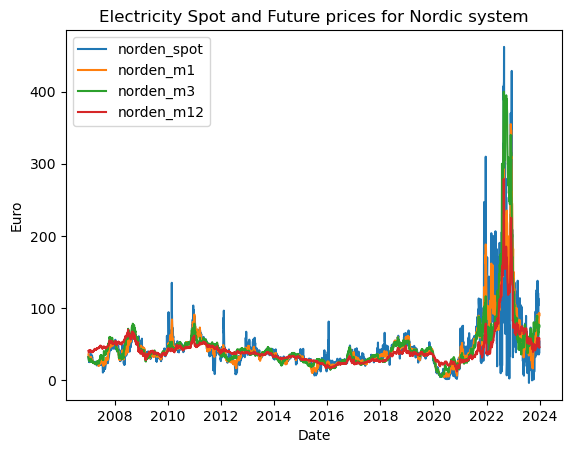

In [13]:
import matplotlib.pyplot as plt

plt.plot(final_df['Date'],final_df['norden_spot'], label='norden_spot')
plt.plot(final_df['Date'],final_df['norden_m1'], label='norden_m1')
plt.plot(final_df['Date'],final_df['norden_m3'], label='norden_m3')
plt.plot(final_df['Date'],final_df['norden_m12'], label='norden_m12')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Euro')
plt.title('Electricity Spot and Future prices for Nordic system')
plt.show()

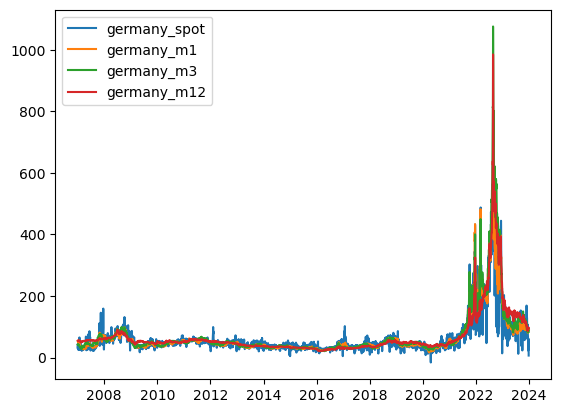

In [14]:
import matplotlib.pyplot as plt

plt.plot(final_df['Date'],final_df['germany_spot'], label='germany_spot')
plt.plot(final_df['Date'],final_df['germany_m1'], label='germany_m1')
plt.plot(final_df['Date'],final_df['germany_m3'], label='germany_m3')
plt.plot(final_df['Date'],final_df['germany_m12'], label='germany_m12')
plt.legend()

plt.show()

In [20]:
## exporting
final_df.to_excel('thesis_data_JAS_final.xlsx', index=False)